<a href="https://colab.research.google.com/github/sunilhucharaddi/fastai-v3/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%matplotlib inline
from fastai.basics import *

**Linear Regression Problem**

In [0]:
n=100

In [6]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9935,  1.0000],
        [-0.0068,  1.0000],
        [ 0.8653,  1.0000],
        [-0.0773,  1.0000],
        [ 0.6690,  1.0000]])

In [7]:
a = tensor(3.,2);a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

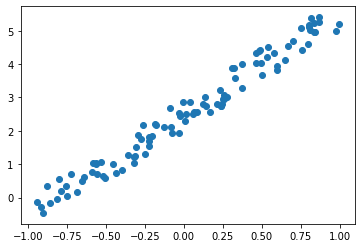

In [9]:
plt.scatter(x[:,0],y)

**Mean Sqaured Error**

In [0]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()

suppose we believe a = (-1,1)

In [0]:
a = tensor(-1.,1)

In [15]:
y_hat = x@a
mse(y_hat,y)

tensor(7.2145)

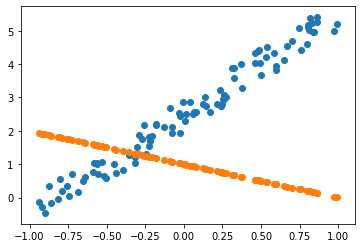

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

**Now we have to find algorithm to find best a by looking for minimum mse achievable *Gradient Descent* is one such funtion**

In [0]:
from fastai import *

In [114]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y,y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
      a.sub_(lr * a.grad)
      a.grad.zero_()


In [116]:
lr = 1e-1
for t in range(100): update()

tensor(7.2145, grad_fn=<MeanBackward0>)
tensor(1.4883, grad_fn=<MeanBackward0>)
tensor(0.5096, grad_fn=<MeanBackward0>)
tensor(0.2150, grad_fn=<MeanBackward0>)
tensor(0.1237, grad_fn=<MeanBackward0>)
tensor(0.0954, grad_fn=<MeanBackward0>)
tensor(0.0866, grad_fn=<MeanBackward0>)
tensor(0.0839, grad_fn=<MeanBackward0>)
tensor(0.0830, grad_fn=<MeanBackward0>)
tensor(0.0828, grad_fn=<MeanBackward0>)


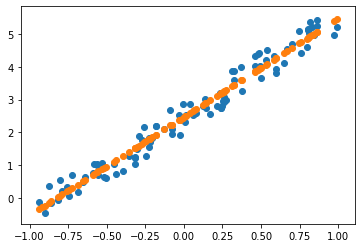

In [117]:
a = a.detach()
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [0]:
from matplotlib import animation,rc
rc('animation',html = 'jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))
fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
a = a.detach()
line, = plt.plot(x[:,0],x@a)
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a)
  return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)